<a href="https://colab.research.google.com/github/lemonwater600ml/6220-hw2/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reference: https://www.tensorflow.org/datasets/keras_example
# Import libraries
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

tfds.disable_progress_bar()
tf.enable_v2_behavior()

# Load data from tfds
start = time.time()

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print("Elapsed time for loading data: \n" +  str(round((time.time() - start)*1000)) + "ms")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Elapsed time for loading data: 
195ms


In [2]:
# Convert to np.array
start = time.time()

train_array = np.vstack(tfds.as_numpy(ds_train))
X_train = np.array(list(map(lambda x: x[0], train_array)))
y_train = np.array(list(map(lambda x: x[1], train_array)))

test_array = np.vstack(tfds.as_numpy(ds_test))
X_test = np.array(list(map(lambda x: x[0], test_array)))
y_test = np.array(list(map(lambda x: x[1], test_array)))

print("Elapsed time for converting data into np.array: \n" +  str(round((time.time() - start)*1000)) + "ms")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


Elapsed time for converting data into np.array: 
34223ms


In [3]:
# np.unique(y_train): 26
# np.unique(y_train): 19
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1, 2, 3]
not_can = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


# Training data
# k = 3    => 3 classes, 1600 
# unkown > 4 ~ 19 => 16 classes. 100 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
  elif 4 <= int(elm) <= 19 and counter[elm - 1] < 100: 
    filter_arr.append(True)
    counter[elm - 1] += 1
  else:
    filter_arr.append(False)

y_train_k3 = y_train[filter_arr]
print(y_train_k3.shape)
# (6400,)
X_train_k3 = X_train[filter_arr]
# (6400, 28, 28, 1)
print(X_train_k3.shape)

# Test data
counter_test = [0] * 26
filter_arr_test = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  elif 4 <= int(elm) <= 19 and counter_test[elm - 1] < 20: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  else:
    filter_arr_test.append(False)

y_test_k3 = y_test[filter_arr_test]
print(y_test_k3.shape)
# (1280,)
X_test_k3 = X_test[filter_arr_test]
# (1280, 28, 28, 1)
print(X_test_k3.shape)


(6400,)
(6400, 28, 28, 1)
(1280,)
(1280, 28, 28, 1)


In [4]:

# # Nomalize images for train and test data
# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


In [5]:
# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(37, activation='softmax')
])

# Model configuration
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)


In [6]:
# Time
start = time.time()

# Train
history = model.fit(
    X_train_k3, y_train_k3,
    epochs=10,
    validation_data=(X_test_k3, y_test_k3),
)

# Print elapsed time
elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 6.0352 - accuracy: 0.5773 - val_loss: 1.5203 - val_accuracy: 0.6680
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2019 - accuracy: 0.7109 - val_loss: 1.2505 - val_accuracy: 0.7148
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.7702 - val_loss: 1.0415 - val_accuracy: 0.7570
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.7975 - val_loss: 0.9899 - val_accuracy: 0.7742
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8355 - val_loss: 0.9855 - val_accuracy: 0.7898
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8544 - val_loss: 1.0109 - val_accuracy: 0.7906
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8673 - val_loss: 0.9195 - val_accuracy: 0.7992
Epoch 

In [7]:
# Evaluate training data
start = time.time()

model.evaluate(x = X_train_k3, y = y_train_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

200/200 - 0s - loss: 0.2672 - accuracy: 0.9141
Elapsed time for evaluating training set: 
188 ms


In [8]:
# Evaluate test data
start = time.time()

model.evaluate(x = X_test_k3, y = y_test_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

40/40 - 0s - loss: 0.9365 - accuracy: 0.8094
Elapsed time for evaluating test set: 
77 ms


Text(0, 0.5, 'Accuray')

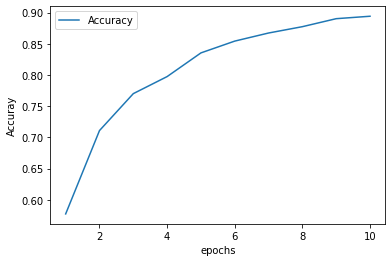

In [9]:
# Make accuracy plot
import matplotlib.pyplot as plt
import seaborn as sns
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
# sns.lineplot(x = range(1,1+q),y = history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [10]:
# k = 11

# np.unique(y_train): 26
# np.unique(y_train): 19
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11 ]
not_can = [12, 13, 14, 15, 16, 17, 18, 19]

# Training data
# k = 10 [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]    
# => 11 classes, 1600 each
# unkown > [12, 13, 14, 15, 16, 17, 18, 19] 
# => 8 classes. 200 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
  elif 12 <= int(elm) <= 19 and counter[elm - 1] < 200: 
    filter_arr.append(True)
    counter[elm - 1] += 1
  else:
    filter_arr.append(False)

y_train_k11 = y_train[filter_arr]
print(y_train_k11.shape)
# (19200,)
X_train_k11 = X_train[filter_arr]
# (19200, 28, 28, 1)
print(X_train_k11.shape)

# Test data
counter_test = [0] * 26
filter_arr_test = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  elif 12 <= int(elm) <= 19 and counter_test[elm - 1] < 40: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  else:
    filter_arr_test.append(False)

y_test_k11 = y_test[filter_arr_test]
print(y_test_k11.shape)
# (3840,)
X_test_k11 = X_test[filter_arr_test]
# (3840, 28, 28, 1)
print(X_test_k11.shape)





(19200,)
(19200, 28, 28, 1)
(3840,)
(3840, 28, 28, 1)


In [11]:
# k = 11
# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(37, activation='softmax')
])

# Model configuration
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)


In [12]:
# k = 11
# Train model
start = time.time()

history11 = model.fit(
    X_train_k3, y_train_k3,
    epochs=10,
    validation_data=(X_test_k3, y_test_k3),
)

elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 5.4621 - accuracy: 0.5797 - val_loss: 1.5428 - val_accuracy: 0.6719
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2032 - accuracy: 0.7113 - val_loss: 1.2578 - val_accuracy: 0.7055
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.7720 - val_loss: 1.2056 - val_accuracy: 0.7398
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.8119 - val_loss: 1.0199 - val_accuracy: 0.7602
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.8334 - val_loss: 1.0158 - val_accuracy: 0.7812
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.8511 - val_loss: 1.0394 - val_accuracy: 0.7688
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8695 - val_loss: 0.8647 - val_accuracy: 0.7977
Epoch 

In [13]:
# k = 11
# Evaluate training data
start = time.time()

model.evaluate(x = X_train_k11, y = y_train_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

600/600 - 0s - loss: 1.9477 - accuracy: 0.6201
Elapsed time for evaluating training set: 
508 ms


In [14]:
# k = 11
# Evaluate test data
start = time.time()

model.evaluate(x = X_test_k11, y = y_test_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

120/120 - 0s - loss: 2.2014 - accuracy: 0.5758
Elapsed time for evaluating test set: 
130 ms


Text(0, 0.5, 'Accuray')

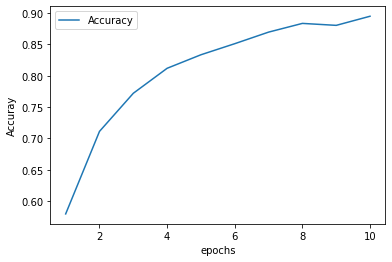

In [15]:
# k = 11
# Make accuracy plot
import matplotlib.pyplot as plt
import seaborn as sns
q = len(history11.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history11.history['accuracy'], label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')